In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
os.getcwd()

'C:\\Users\\xjiang\\Documents\\Kaggle'

### Load Data Tables

In [4]:
def load_db(db_path):
    # Open Connection to sqlite database
    con = sqlite3.connect(db_path)
    tables = con.cursor().execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    
    result = {}
    for t in tables:
        t = str(t).replace("('", '').replace("',)", '')
        q = 'SELECT * from %s' % t
        df = pd.read_sql_query(q, con)
        result[t] = df
        print(t)
    return(result)

In [5]:
soccer_tbls = load_db("database.sqlite")

sqlite_sequence
Player_Attributes
Player
League
Country
Team
Team_Attributes
Match


In [11]:
soccer_tbls['Player'].head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [14]:
soccer_tbls['sqlite_sequence'].head()

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Player,11075
4,Player_Attributes,183978


In [15]:
soccer_tbls['Player_Attributes'].head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [16]:
soccer_tbls['League'].head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [17]:
soccer_tbls['Country'].head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [18]:
soccer_tbls['Team'].head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [19]:
soccer_tbls['Team_Attributes'].head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [22]:
soccer_tbls['Match'].head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,outcome
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.65,3.40,4.50,1.78,3.25,4.0,1.73,3.40,4.20,tie
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,2.00,3.25,3.25,1.85,3.25,3.0,1.91,3.25,3.60,tie
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.35,3.25,2.65,2.50,3.20,2.0,2.30,3.20,2.75,away_win
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.45,3.75,6.50,1.50,3.75,5.0,1.44,3.75,6.50,home_win
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.40,1.65,4.50,3.50,1.0,4.75,3.30,1.67,away_win


In [32]:
soccer_tbls['Match'].outcome.value_counts()

home_win    11771
away_win     7364
tie          6510
Name: outcome, dtype: int64

In [12]:
(100*soccer_tbls['Match'].outcome.value_counts()/len(soccer_tbls['Match'].outcome)).round(2).astype(str)+'%'

home_win     45.9%
away_win    28.72%
tie         25.39%
Name: outcome, dtype: object

## Explore Rlationship Between Soccer Lottery and Match Outcome

In [202]:
df_sub = soccer_tbls['Match'].loc[:,'B365H':'outcome']

In [203]:
df_sub2 = pd.melt(df_sub,id_vars = ['outcome'],
                 var_name = 'bet_source',
                 value_name = 'bet_score')

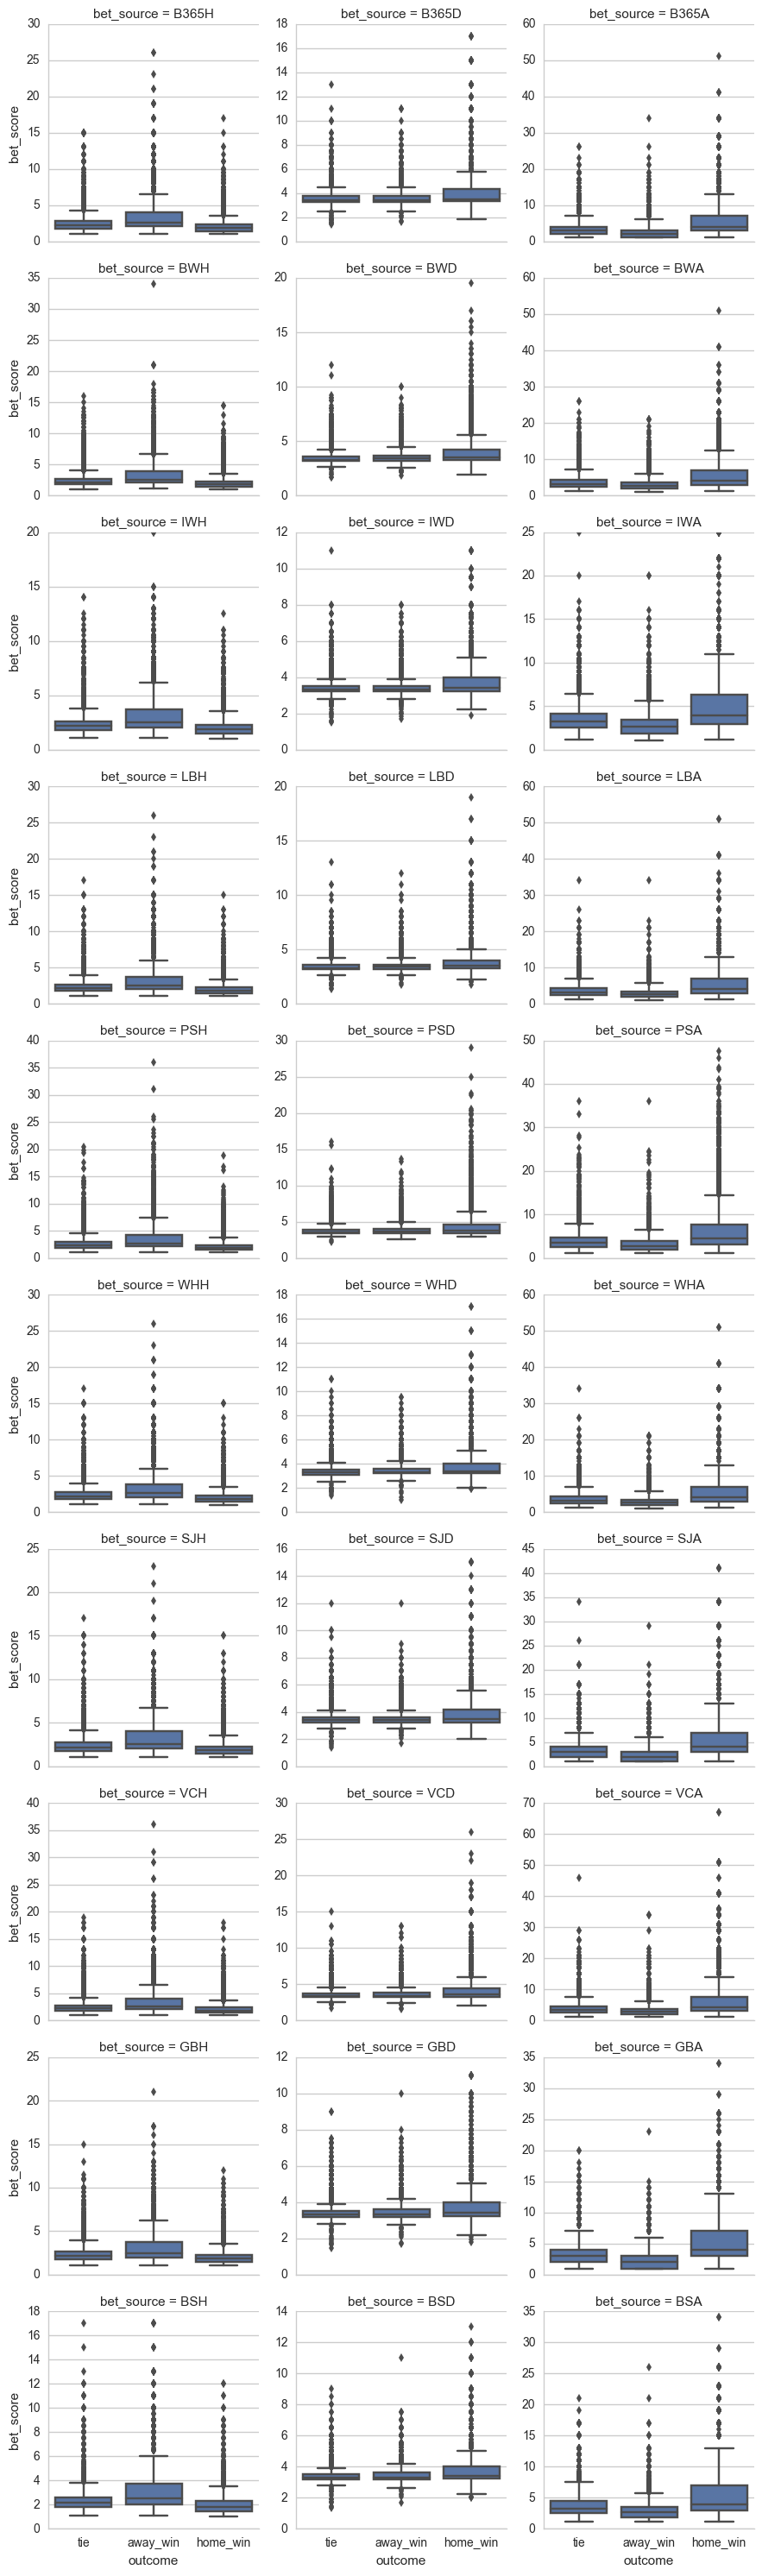

In [205]:
sns.set_style("whitegrid")
g = sns.FacetGrid(df_sub2,col = "bet_source",size = 3, aspect = 1,col_wrap = 3, sharey = False)
g = g.map(sns.boxplot,"outcome","bet_score")

## Explore Missing Distributions

In [60]:
score_vars = list(soccer_tbls['Match'].loc[:,'B365H':'outcome'].columns)

extra_vars = pd.Series(['country_id', 'league_id', 'season'])

vars = extra_vars.append(pd.Series(score_vars))

In [61]:
match_sub1 = soccer_tbls['Match'].loc[:,vars]

In [124]:
match_sub1.head()

,country_id,league_id,season,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,outcome
0,1,1,2008/2009,1.73,3.40,5.0,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.0,1.73,3.40,4.20,tie
1,1,1,2008/2009,1.95,3.20,3.0,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.0,2.00,3.25,3.25,1.85,3.25,3.0,1.91,3.25,3.60,tie
2,1,1,2008/2009,2.38,3.30,2.0,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.0,2.35,3.25,2.65,2.50,3.20,2.0,2.30,3.20,2.75,away_win
3,1,1,2008/2009,1.44,3.75,7.0,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.0,1.45,3.75,6.50,1.50,3.75,5.0,1.44,3.75,6.50,home_win
4,1,1,2008/2009,5.00,3.50,1.0,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.0,4.50,3.40,1.65,4.50,3.50,1.0,4.75,3.30,1.67,away_win


In [62]:
match_sub1.isnull().sum()

country_id        0
league_id         0
season            0
B365H          3335
B365D          3335
B365A          3335
BWH            3352
BWD            3352
BWA            3352
IWH            3406
IWD            3406
IWA            3406
LBH            3370
LBD            3370
LBA            3370
PSH           14758
PSD           14758
PSA           14758
WHH            3356
WHD            3356
WHA            3356
SJH            8548
SJD            8548
SJA            8548
VCH            3359
VCD            3359
VCA            3359
GBH           11483
GBD           11483
GBA           11483
BSH           11484
BSD           11484
BSA           11484
outcome           0
dtype: int64

In [125]:
pd.set_option('max_columns', 50)
match_by_country = match_sub1.groupby('country_id')[score_vars].agg({'Missing_Count': lambda y: y.isnull().sum(),
                                                      'total_Count': np.size,
                                                 'Missing_Rate': lambda x: x.isnull().sum()/np.size(x)})


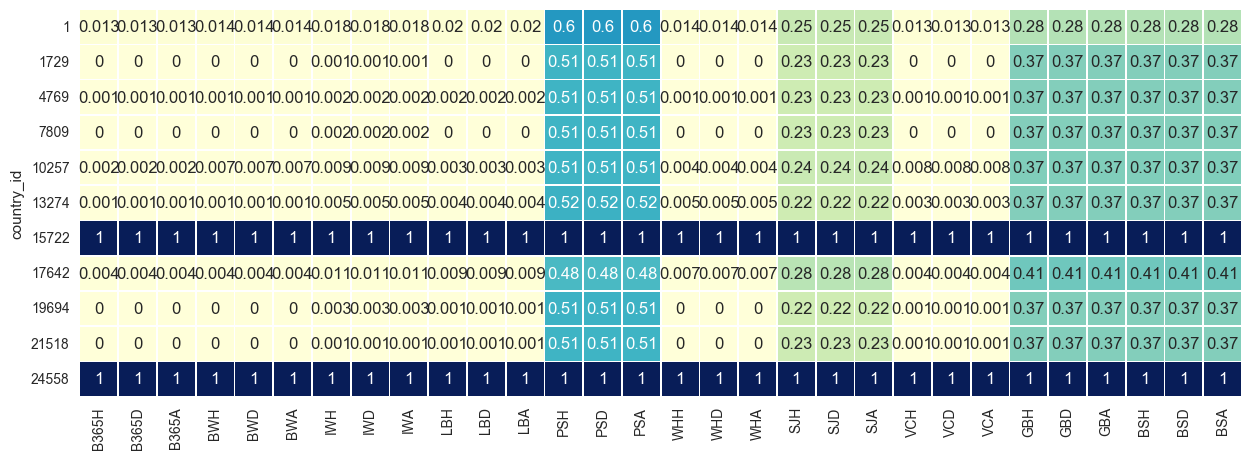

In [132]:
fig,ax = plt.subplots(figsize = (15,5))
sns.heatmap(match_by_country['Missing_Rate'].drop('outcome',1).round(3),annot = True,cmap = 'YlGnBu',
            linewidth = .5,cbar = False,ax = ax)

In [133]:
pd.set_option('max_columns', 50)
match_by_season = match_sub1.groupby('season')[score_vars].agg({'Missing_Count': lambda y: y.isnull().sum(),
                                                      'total_Count': np.size,
                                                 'Missing_Rate': lambda x: x.isnull().sum()/np.size(x)})


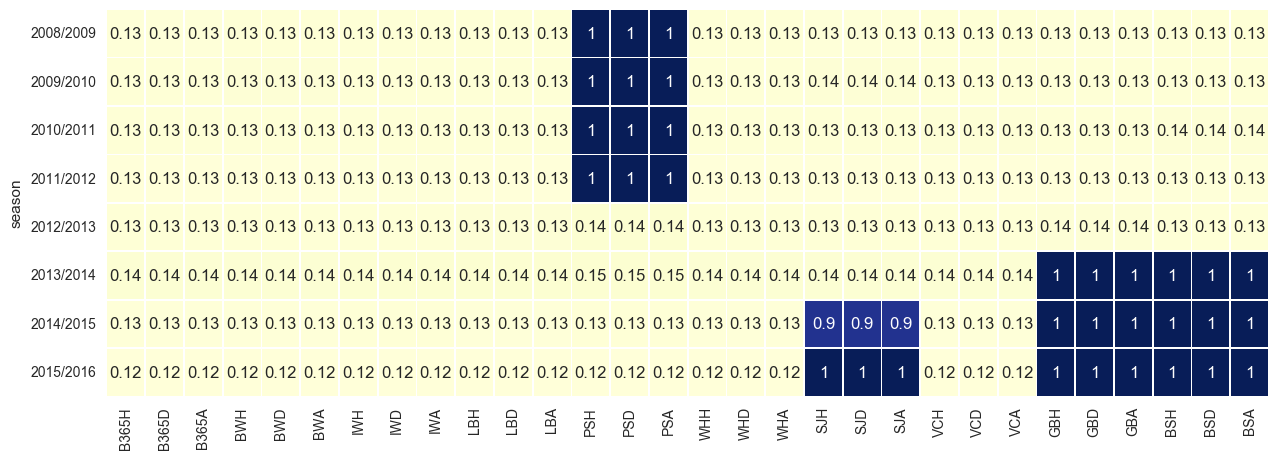

In [135]:
fig,ax = plt.subplots(figsize = (15,5))
sns.heatmap(match_by_season['Missing_Rate'].drop('outcome',1).round(3),annot = True,cmap = 'YlGnBu',
            linewidth = .5,cbar = False,ax = ax)

## Select Match Level Variables

In [130]:
Match_main = pd.Series(['id','country_id','league_id','season','stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal','outcome'])
Gamb_var = pd.Series(list(soccer_tbls['Match'].loc[:,'B365H':'BSA'].columns))
Gamb_var = Gamb_var.drop(Gamb_var.index[[12,13,14,18,19,20,24,25,26,27,28,29]])
Match_Vars = Match_main.append(Gamb_var)

In [77]:
df_match = soccer_tbls['Match'].loc[:,Match_Vars]

In [116]:
Match_Vars.to_csv('Match_Vars.csv',sep = '\t',header = False,index = False)
Gamb_var.to_csv('Gamb_var.csv',sep = '\t',header = False,index = False)

df_match.to_csv('df_match.csv',sep = '\t')

## Reformat the Team Table

In [215]:
def team_clean(team):
    #select team level variables
    team_info = team.loc[:,'buildUpPlaySpeed':'defenceDefenderLineClass']
    id_info = team.loc[:,['team_api_id','date']]
    team_upd = pd.concat([id_info,team_info],axis = 1)
    #change date format
    team_upd.date = pd.to_datetime(team_upd.date)
    #Create Season for each team statistics
    team_upd['year'] = team_upd.date.dt.year
    team_upd['month']= team_upd.date.dt.month
    team_upd['year2'] = np.where(team_upd.month >= 6, team_upd.year + 1, team_upd.year - 1)
    team_upd['season'] = np.where(team_upd.year < team_upd.year2, team_upd.year.astype(str) + "/" + team_upd.year2.astype(str),
                          team_upd.year2.astype(str) + "/" + team_upd.year.astype(str))    
    team_upd = team_upd.drop(['year','month','year2','date'],axis = 1)
    #Remove team categorical features
    team_upd = team_upd.drop(team_upd.filter(regex= 'Class').columns,axis = 1)
    #Impute team info by the mean of each team across years
    impute_vars = team_upd.loc[:,'buildUpPlaySpeed':'defenceTeamWidth'].columns
    for col in impute_vars:
        team_upd.loc[team_upd[col].isnull(),col] = team_upd['team_api_id'].map(
            team_upd.groupby('team_api_id')[col].mean())
    return team_upd

In [216]:
team = team_clean(soccer_tbls['Team_Attributes'])
home_team = team.add_suffix('_home')
away_team = team.add_suffix('_away')

In [209]:
home_team.head()

,team_api_id_home,buildUpPlaySpeed_home,buildUpPlayDribbling_home,buildUpPlayPassing_home,chanceCreationPassing_home,chanceCreationCrossing_home,chanceCreationShooting_home,defencePressure_home,defenceAggression_home,defenceTeamWidth_home,season_home
0,9930,60.0,44.5,50.0,60.0,65.0,55.0,50.0,55.0,45.0,2009/2010
1,9930,52.0,48.0,56.0,54.0,63.0,64.0,47.0,44.0,54.0,2014/2015
2,9930,47.0,41.0,54.0,54.0,63.0,64.0,47.0,44.0,54.0,2015/2016
3,8485,70.0,64.0,70.0,70.0,70.0,70.0,60.0,70.0,70.0,2009/2010
4,8485,47.0,64.0,52.0,53.0,48.0,52.0,47.0,47.0,52.0,2010/2011


In [210]:
home_team.to_csv('home_team.csv',sep = '\t')
away_team.to_csv('away_team.csv',sep = '\t')

## Combin Match and Team Tables

In [80]:
Match_Team = pd.merge(df_match,home_team,left_on = ['home_team_api_id','season'],right_on = ['team_api_id_home','season_home'],
                     how = "left")

Match_Team = pd.merge(Match_Team,away_team,left_on = ['away_team_api_id','season'],right_on = ['team_api_id_away','season_away'],
                     how = "left")

Match_Team = Match_Team.drop(['team_api_id_home','team_api_id_away','season_home','season_away'],axis = 1)

Match_Team.to_csv('match_n_team.csv',sep = '\t')

### Team Information Missingness Check

In [40]:
Match_Team.groupby('season')['chanceCreationShooting_away'].aggregate(lambda x: x.isnull().sum())

season
2008/2009    3326.0
2009/2010       0.0
2010/2011      15.0
2011/2012      30.0
2012/2013    3260.0
2013/2014     149.0
2014/2015     232.0
2015/2016     182.0
Name: chanceCreationShooting_away, dtype: float64

In [42]:
Match_Team.groupby('season')['buildUpPlaySpeed_home'].aggregate(lambda x: x.isnull().sum())

season
2008/2009    3326.0
2009/2010       0.0
2010/2011      15.0
2011/2012      30.0
2012/2013    3260.0
2013/2014     149.0
2014/2015     234.0
2015/2016     167.0
Name: buildUpPlaySpeed_home, dtype: float64

In [60]:
id_info.date.unique()

array(['2010-02-22 00:00:00', '2014-09-19 00:00:00', '2015-09-10 00:00:00',
       '2011-02-22 00:00:00', '2012-02-22 00:00:00', '2013-09-20 00:00:00'], dtype=object)

## Define a Comprehensive  Function for Data Cleaning

### team_clean Fucntion and team_impute Fuction are called in this function

In [218]:
def data_clean(Match_tbl,Team_tbl,match_vars,gamb_vars):
    # Prepare team table
    team = team_clean(Team_tbl)
    home_team = team.add_suffix('_home')
    away_team = team.add_suffix('_away')
    # Prepare match table
    df_match = Match_tbl.loc[:,match_vars]
    # Combin match and team
    Match_Team = pd.merge(df_match,home_team,left_on = ['home_team_api_id','season'],right_on = ['team_api_id_home','season_home'],
                     how = "left")
    Match_Team = pd.merge(Match_Team,away_team,left_on = ['away_team_api_id','season'],right_on = ['team_api_id_away','season_away'],
                     how = "left")
    Match_Team = Match_Team.drop(['team_api_id_home','team_api_id_away','season_home','season_away'],axis = 1)
    # team feature second level imputation
    imp_vars = Match_Team.filter(regex = "_home|_away",axis = 1).columns
    for col in imp_vars:
        Match_Team.loc[Match_Team[col].isnull(),col] = Match_Team[col].mean()
    # Create team difference variables
    home_vars = Match_Team.filter(regex = "_home",axis = 1).columns
    stat_vars = pd.Series(home_vars).apply(lambda x: x.replace('_home',''))
    for var in stat_vars:
        var_diff = var + '_diff'
        var_home = var + '_home'
        var_away = var + '_away'
        Match_Team[var_diff] = Match_Team[var_home] - Match_Team[var_away]
    # Create missing indicator for missing gambling scores
    for var in gamb_vars:
        miss_ind = var + '_miss'
        Match_Team[miss_ind] = np.where(Match_Team[var].isnull(),0,1)
        Match_Team.loc[Match_Team[var].isnull(),var] = Match_Team[var].mean()  
    return Match_Team


### Use the data_clean function to Prepare model data

In [233]:
match_vars = pd.read_csv('Match_Vars.csv',sep = '\t',header = None)
gamb_vars = pd.read_csv('Gamb_var.csv',sep = '\t', header = None)
df_Model = data_clean(soccer_tbls['Match'],soccer_tbls['Team_Attributes'],match_vars.iloc[:,0],gamb_vars.iloc[:,0])

### Remove Season 2008/2009 and 2012 and 2013

In [234]:
df_Model = df_Model[- df_Model.season.isin(['2008/2009','2012/2013'])]

### Explore relationship between team features and match outcomes

In [360]:
diff_vars = df_Model.filter(regex='_diff|outcome')

In [361]:
diff_vars2 = pd.melt(diff_vars,id_vars = ['outcome'],
                 var_name = 'team_measure',
                 value_name = 'team_score')

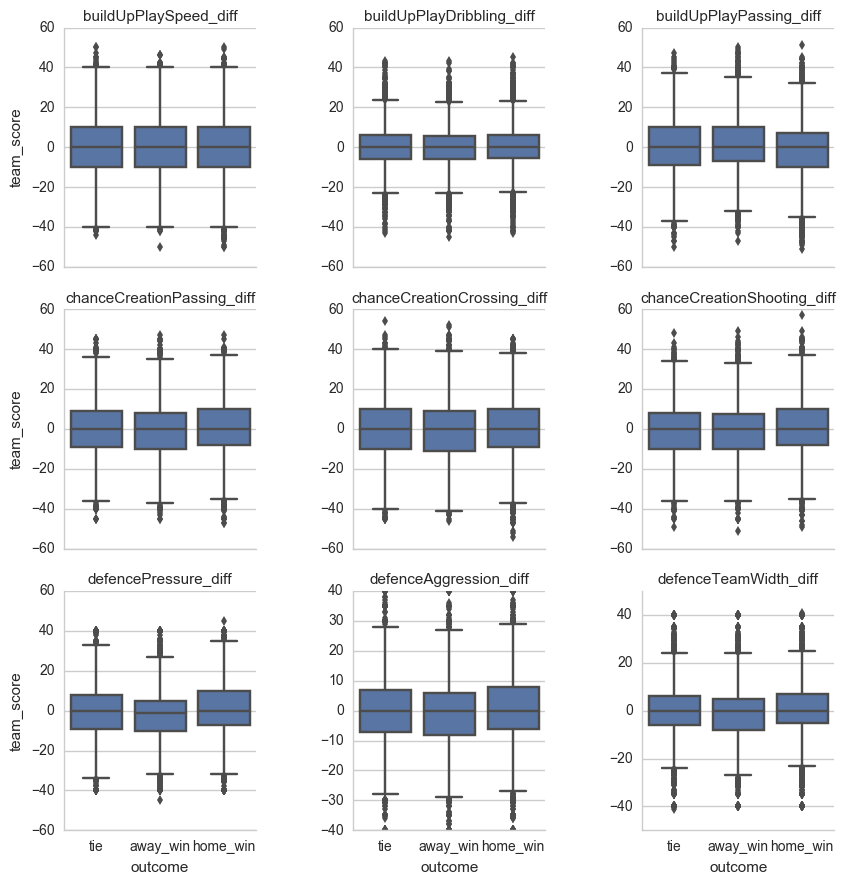

In [365]:
sns.set_style("whitegrid")
g = sns.FacetGrid(diff_vars2,col = "team_measure",size = 3, aspect = 1,col_wrap = 3, sharey = False)
g = g.map(sns.boxplot,"outcome","team_score")
g.set_titles('{col_name}')

### Build Models

In [166]:
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing

#### Model with both team info and gambling scores

In [235]:
X = df_Model.drop(['id','country_id','stage','date','season','match_api_id','home_team_api_id',
                          'away_team_api_id','home_team_goal','away_team_goal','outcome'],axis = 1)
Y = df_Model['outcome']

In [236]:
X['league_id'] = X['league_id'].astype('object')
X = pd.get_dummies(X)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [238]:
rf = RandomForestClassifier(max_depth=4, max_features = 4, min_samples_leaf = 40,n_estimators=500)
gbm = GradientBoostingClassifier(max_depth = 4, learning_rate = 0.01, n_estimators=500)

#### GBM model performance

In [239]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [240]:
y_pred_gbm = gbm.predict(X_test)

In [241]:
confusion_matrix(y_test,y_pred_gbm,labels = ['home_win','tie','away_win'])

array([[2222,   30,  364],
       [1057,   24,  399],
       [ 889,   19,  714]])

In [242]:
accuracy_score(y_test,y_pred_gbm)

0.51766351871283667

#### Random Forest performance

In [243]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=40,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [244]:
y_pred_rf = rf.predict(X_test)

In [245]:
confusion_matrix(y_test,y_pred_rf,labels = ['home_win','tie','away_win'])

array([[2258,    0,  358],
       [1087,    0,  393],
       [ 922,    0,  700]])

In [246]:
accuracy_score(y_test,y_pred_rf)

0.51731374606505776

### Discard gambling ratings and Refit the model

In [247]:
miss_ind = pd.Series(X.filter(regex= '_miss').columns)
gamb_all = gamb_vars.iloc[:,0].append(miss_ind)

In [248]:
X_noscore = X.drop(gamb_all, axis = 1)

In [249]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_noscore, Y, test_size=0.3,stratify = Y)

In [250]:
gbm2 = GradientBoostingClassifier(max_depth = 4, learning_rate = 0.05, n_estimators=500)

In [251]:
gbm2.fit(X_train2, y_train2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [252]:
y_pred_gbm2 = gbm2.predict(X_test2)

In [254]:
confusion_matrix(y_test2,y_pred_gbm2,labels = ['home_win','tie','away_win'])

array([[2144,  176,  308],
       [1007,  130,  311],
       [1022,  123,  497]])

In [255]:
accuracy_score(y_test2,y_pred_gbm2)

0.48461000349772648

#### SVM OVO

In [280]:
X_scale = preprocessing.scale(X_noscore)

In [281]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scale, Y, test_size=0.3,stratify = Y)

In [298]:
svm_ovo = SVC(C = 0.8, cache_size = 1000,class_weight = {'home_win':0.4,'tie':0.2,'away_win':0.4},
              decision_function_shape = 'ovo')
svm_ovo.fit(X_train3,y_train3)

SVC(C=0.8, cache_size=1000,
  class_weight={'home_win': 0.4, 'away_win': 0.4, 'tie': 0.2}, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [299]:
y_pred_svmovo = svm_ovo.predict(X_test3)

In [311]:
confusion_matrix(y_test3,y_pred_svmovo,labels = ['home_win','tie','away_win'])

array([[2525,    0,  103],
       [1341,    0,  107],
       [1391,    0,  251]])

In [312]:
accuracy_score(y_test3,y_pred_svmovo)

0.48548443511717382

#### SVM OVR

In [302]:
svm_ovr = SVC(C = 0.8, cache_size = 1000,class_weight = {'home_win':0.4,'tie':0.2,'away_win':0.4},
              decision_function_shape = 'ovr')
svm_ovr.fit(X_train3,y_train3)

SVC(C=0.8, cache_size=1000,
  class_weight={'home_win': 0.4, 'away_win': 0.4, 'tie': 0.2}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [303]:
y_pred_svmovr = svm_ovr.predict(X_test3)

In [313]:
confusion_matrix(y_test3,y_pred_svmovr,labels = ['home_win','tie','away_win'])

array([[2525,    0,  103],
       [1341,    0,  107],
       [1391,    0,  251]])

In [314]:
accuracy_score(y_test3,y_pred_svmovr)

0.48548443511717382

#### SVM LSVC

In [309]:
svm_lsvc = LinearSVC(C = 0.8, class_weight = {'home_win':0.4,'tie':0.2,'away_win':0.4})
svm_lsvc.fit(X_train3,y_train3)

LinearSVC(C=0.8, class_weight={'home_win': 0.4, 'away_win': 0.4, 'tie': 0.2},
     dual=True, fit_intercept=True, intercept_scaling=1,
     loss='squared_hinge', max_iter=1000, multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

In [310]:
y_pred_lsvc = svm_lsvc.predict(X_test3)

In [315]:
confusion_matrix(y_test3,y_pred_lsvc,labels = ['home_win','tie','away_win'])

array([[2463,    0,  165],
       [1335,    0,  113],
       [1471,    0,  171]])

In [316]:
accuracy_score(y_test3,y_pred_lsvc)

0.46065057712486884

## Prepare Test Dataset

#### Data Preparation Function

In [196]:
x_slt = pd.read_csv('solution_set.csv')
y_slt = pd.read_csv('sample_solution.csv')

In [229]:
x_slt_clean = data_clean(x_slt,soccer_tbls['Team_Attributes'],match_vars.iloc[:,0],gamb_vars.iloc[:,0])

In [230]:
x_slt_clean.filter(regex = '_miss').apply(lambda x: x.value_counts(), 0)

,B365H_miss,B365D_miss,B365A_miss,BWH_miss,BWD_miss,BWA_miss,IWH_miss,IWD_miss,IWA_miss,LBH_miss,LBD_miss,LBA_miss,WHH_miss,WHD_miss,WHA_miss,VCH_miss,VCD_miss,VCA_miss
1,282,282,282,282,282,282,281,281,281,281,281,281,282,282,282,282,282,282
0,52,52,52,52,52,52,53,53,53,53,53,53,52,52,52,52,52,52


In [257]:
x_slt_clean['league_id'] = x_slt_clean['league_id'].astype('object')
x_slt_clean = pd.get_dummies(x_slt_clean)
x_slt_clean_upd = x_slt_clean[X_train.columns]

### gbm estimation

In [259]:
slt_pred_gbm = gbm.predict(x_slt_clean_upd)

In [260]:
confusion_matrix(y_slt.outcome,slt_pred_gbm,labels = ['home_win','tie','away_win'])

array([[76,  1, 37],
       [73,  0, 26],
       [69,  1, 51]])

In [262]:
accuracy_score(slt_pred_gbm,y_slt.outcome)

0.38023952095808383

### gbm2 estimation

In [264]:
x_slt_clean_upd2 = x_slt_clean_upd.drop(gamb_all, axis = 1)
slt_pred_gbm2 = gbm2.predict(x_slt_clean_upd2)

In [265]:
confusion_matrix(y_slt.outcome,slt_pred_gbm2,labels = ['home_win','tie','away_win'])

array([[77,  8, 29],
       [74,  4, 21],
       [74,  6, 41]])

In [266]:
accuracy_score(y_slt.outcome,slt_pred_gbm2)

0.3652694610778443

### random forest estimation

In [267]:
slt_pred_rf = rf.predict(x_slt_clean_upd)

In [268]:
confusion_matrix(y_slt.outcome,slt_pred_rf,labels = ['home_win','tie','away_win'])

array([[83,  0, 31],
       [75,  0, 24],
       [74,  0, 47]])

In [269]:
accuracy_score(slt_pred_rf,y_slt.outcome)

0.38922155688622756

### SVM estimation

In [317]:
x_slt_clean_scaled = preprocessing.scale(x_slt_clean_upd2)

In [318]:
slt_pred_svm = svm_ovo.predict(x_slt_clean_scaled)

In [319]:
confusion_matrix(y_slt.outcome,slt_pred_svm,labels = ['home_win','tie','away_win'])

array([[106,   0,   8],
       [ 95,   0,   4],
       [109,   0,  12]])

In [320]:
accuracy_score(slt_pred_svm,y_slt.outcome)

0.3532934131736527

## Split ties into win and loss
### Only estimate home_win and away_win

In [327]:
df_Model_ties = df_Model.query("outcome == 'tie'")
df_Model_nontie = df_Model.query("outcome != 'tie'")

In [332]:
df_Model_tie2hmwin = df_Model_ties.copy()
df_Model_tie2hmwin.loc[:,'outcome'] = 'home_win'
df_Model_tie2awwin = df_Model_ties.copy()
df_Model_tie2awwin.loc[:,'outcome'] = 'away_win'

In [335]:
df_Model_upd = pd.concat([df_Model_nontie,df_Model_tie2hmwin,df_Model_tie2awwin])

In [338]:
X_upd = df_Model_upd.drop(['id','country_id','stage','date','season','match_api_id','home_team_api_id',
                          'away_team_api_id','home_team_goal','away_team_goal','outcome'],axis = 1)
Y_upd = df_Model_upd['outcome']

In [339]:
X_upd['league_id'] = X_upd['league_id'].astype('object')
X_noscore_upd = X_upd.drop(gamb_all, axis = 1)
X_noscore_upd = pd.get_dummies(X_noscore_upd)

In [342]:
gbm_upd = GradientBoostingClassifier(max_depth = 4, learning_rate = 0.05, n_estimators=500)

In [350]:
gbm_upd.fit(X_noscore_upd, Y_upd)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [357]:
y_pred_gbm_upd = gbm_upd.predict(x_slt_clean_upd2)

In [358]:
confusion_matrix(y_slt.outcome,y_pred_gbm_upd,labels = ['home_win','tie','away_win'])

array([[93,  0, 21],
       [77,  0, 22],
       [83,  0, 38]])

In [359]:
accuracy_score(y_slt.outcome,y_pred_gbm_upd)

0.39221556886227543